In [1]:
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

In [2]:
import numpy as np

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 100)
x_valid = np.random.uniform(-1, 1, 10)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.15 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

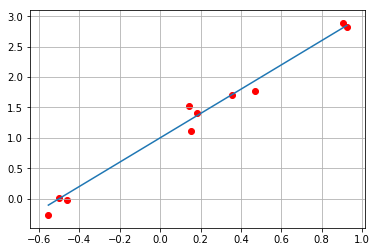

In [3]:
# plot training and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target)
plt.scatter(x_valid, y_valid, color='r')
plt.grid(True); plt.show()

In [4]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [5]:
# get a summary of our composed model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [6]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=16, epochs=100,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Train on 100 samples, validate on 10 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
100/100 [==============================] - 0s 3ms/sample - loss: 2.5524 - mean_squared_error: 2.5524 - val_loss: 2.8593 - val_mean_squared_error: 2.8593
Epoch 2/100
100/100 [==============================] - 0s 131us/sample - loss: 2.2319 - mean_squared_error: 2.2319 - val_loss: 2.4282 - val_mean_squared_error: 2.4282
Epoch 3/100
100/100 [==============================] - 0s 261us/sample - loss: 1.9377 - mean_squared_error: 1.9377 - val_loss: 2.1115 - val_mean_squared_error: 2.1115
Epoch 4/100
100/100 [==============================] - 0s 255us/sample - loss: 1.7152 - mean_squared_error: 1.7152 - val_loss: 1.8231 - val_mean_squared_error: 1.8231
Epoch 5/100
100/100 [==============================] - 0s 264us/sample - loss: 1.5132 - mean_squared_error: 1.5132 - val_loss: 1.6180 - val_mean_squared_error: 1.6180
Epoch 6/100
100/100 [==============================] - 0s 308us/sample - l

100/100 [==============================] - 0s 129us/sample - loss: 0.0483 - mean_squared_error: 0.0483 - val_loss: 0.0381 - val_mean_squared_error: 0.0381
Epoch 48/100
100/100 [==============================] - 0s 143us/sample - loss: 0.0463 - mean_squared_error: 0.0463 - val_loss: 0.0363 - val_mean_squared_error: 0.0363
Epoch 49/100
100/100 [==============================] - 0s 148us/sample - loss: 0.0443 - mean_squared_error: 0.0443 - val_loss: 0.0346 - val_mean_squared_error: 0.0346
Epoch 50/100
100/100 [==============================] - 0s 151us/sample - loss: 0.0425 - mean_squared_error: 0.0425 - val_loss: 0.0332 - val_mean_squared_error: 0.0332
Epoch 51/100
100/100 [==============================] - 0s 149us/sample - loss: 0.0409 - mean_squared_error: 0.0409 - val_loss: 0.0315 - val_mean_squared_error: 0.0315
Epoch 52/100
100/100 [==============================] - 0s 146us/sample - loss: 0.0390 - mean_squared_error: 0.0390 - val_loss: 0.0302 - val_mean_squared_error: 0.0302
Epoch

Epoch 96/100
100/100 [==============================] - 0s 132us/sample - loss: 0.0226 - mean_squared_error: 0.0226 - val_loss: 0.0185 - val_mean_squared_error: 0.0185
Epoch 97/100
100/100 [==============================] - 0s 121us/sample - loss: 0.0226 - mean_squared_error: 0.0226 - val_loss: 0.0184 - val_mean_squared_error: 0.0184
Epoch 98/100
100/100 [==============================] - 0s 125us/sample - loss: 0.0226 - mean_squared_error: 0.0226 - val_loss: 0.0185 - val_mean_squared_error: 0.0185
Epoch 99/100
100/100 [==============================] - 0s 113us/sample - loss: 0.0226 - mean_squared_error: 0.0226 - val_loss: 0.0185 - val_mean_squared_error: 0.0185
Epoch 100/100
100/100 [==============================] - 0s 140us/sample - loss: 0.0226 - mean_squared_error: 0.0226 - val_loss: 0.0184 - val_mean_squared_error: 0.0184


In [7]:
# return weights
model.get_weights()

[array([[2.0138013]], dtype=float32), array([1.0186657], dtype=float32)]

In [8]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('mse:', score[1])

10/10 [==============================] - 0s 99us/sample - loss: 0.0184 - mean_squared_error: 0.0184

Test loss: 0.01838289014995098
mse: 0.01838289


In [9]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('mse:', score[1])

10/10 [==============================] - 0s 88us/sample - loss: 4.8658e-04 - mean_squared_error: 4.8658e-04

Test loss: 0.00048658213927410543
mse: 0.00048658214


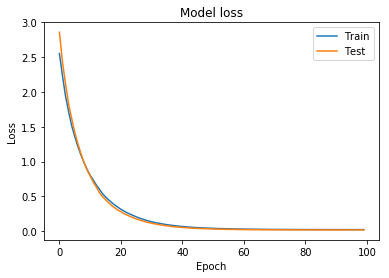

In [10]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

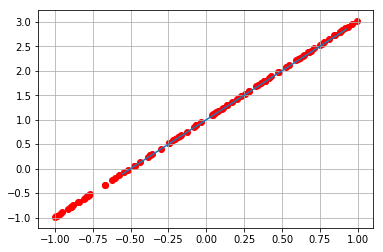

In [11]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

# es11.2

$$
f(x)=4-3x-2x^2+3x^3
$$
for $x \in [-1,1]$.

In [12]:
# target parameters of f(x) = m*x + b
a = 4 
b = -3
c = -2
d = 3

In [13]:
# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 1000)
x_valid = np.random.uniform(-1, 1, 100)
x_valid.sort()
y_target = a + b * x_valid + c * x_valid**2 + d * x_valid**3  # ideal (target) function

sigma = 0.1 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(a + b * x_train + c * x_train**2 + d * x_train**3, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(a + b * x_valid + c * x_valid**2 + d * x_valid**3, sigma)

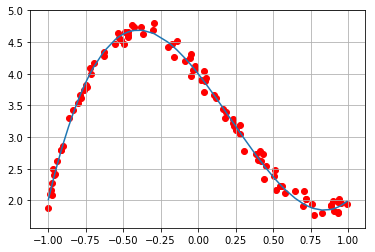

In [14]:
# plot training and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target)
plt.scatter(x_valid, y_valid, color='r')
plt.grid(True); plt.show()

le prestazioni migliorano variando i seguenti parametri: [max dopo il quale non si osserva un miglioramento]
 - #layers [5]
 - #node each layer [15]
 - activation function = selu 0.0019
     (relu though gives better results around the right end of the function)
 - epoch [60]
 - batch [32]
 - noise [0.1]

In [15]:
# compose the NN model
activ = 'relu'
n_nodes = 15

model = tf.keras.Sequential()
model.add(Dense(n_nodes, input_shape=(1,), activation=activ))
model.add(Dense(n_nodes, activation=activ))
model.add(Dense(n_nodes, activation=activ))
model.add(Dense(n_nodes, activation=activ))
model.add(Dense(n_nodes, activation=activ))
#model.add(Dense(n_nodes, activation=activ))
#model.add(Dense(n_nodes, activation=activ))
#model.add(Dense(n_nodes, activation=activ))

model.add(Dense(1))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
# get a summary of our composed model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 15)                30        
_________________________________________________________________
dense_2 (Dense)              (None, 15)                240       
_________________________________________________________________
dense_3 (Dense)              (None, 15)                240       
_________________________________________________________________
dense_4 (Dense)              (None, 15)                240       
_________________________________________________________________
dense_5 (Dense)              (None, 15)                240       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 16        
Total params: 1,006
Trainable params: 1,006
Non-trainable params: 0
_________________________________________________________________


In [16]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=60,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Train on 1000 samples, validate on 100 samples
Epoch 1/60
1000/1000 [==============================] - 1s 614us/sample - loss: 3.3979 - mean_squared_error: 3.3979 - val_loss: 0.8612 - val_mean_squared_error: 0.8612
Epoch 2/60
1000/1000 [==============================] - 0s 89us/sample - loss: 0.4393 - mean_squared_error: 0.4393 - val_loss: 0.7134 - val_mean_squared_error: 0.7134
Epoch 3/60
1000/1000 [==============================] - 0s 83us/sample - loss: 0.3398 - mean_squared_error: 0.3398 - val_loss: 0.5925 - val_mean_squared_error: 0.5925
Epoch 4/60
1000/1000 [==============================] - 0s 81us/sample - loss: 0.2729 - mean_squared_error: 0.2729 - val_loss: 0.4055 - val_mean_squared_error: 0.4055
Epoch 5/60
1000/1000 [==============================] - 0s 86us/sample - loss: 0.2040 - mean_squared_error: 0.2040 - val_loss: 0.2850 - val_mean_squared_error: 0.2850
Epoch 6/60
1000/1000 [==============================] - 0s 83us/sample - loss: 0.1514 - mean_squared_error: 0.1514 - 

1000/1000 [==============================] - 0s 86us/sample - loss: 0.0164 - mean_squared_error: 0.0164 - val_loss: 0.0130 - val_mean_squared_error: 0.0130
Epoch 50/60
1000/1000 [==============================] - 0s 85us/sample - loss: 0.0114 - mean_squared_error: 0.0114 - val_loss: 0.0126 - val_mean_squared_error: 0.0126
Epoch 51/60
1000/1000 [==============================] - 0s 84us/sample - loss: 0.0119 - mean_squared_error: 0.0119 - val_loss: 0.0113 - val_mean_squared_error: 0.0113
Epoch 52/60
1000/1000 [==============================] - 0s 85us/sample - loss: 0.0111 - mean_squared_error: 0.0111 - val_loss: 0.0208 - val_mean_squared_error: 0.0208
Epoch 53/60
1000/1000 [==============================] - 0s 84us/sample - loss: 0.0128 - mean_squared_error: 0.0128 - val_loss: 0.0159 - val_mean_squared_error: 0.0159
Epoch 54/60
1000/1000 [==============================] - 0s 87us/sample - loss: 0.0122 - mean_squared_error: 0.0122 - val_loss: 0.0142 - val_mean_squared_error: 0.0142
Epoc

In [17]:
# return weights
model.get_weights()

[array([[ 0.1237992 ,  0.03787076, -0.7018462 , -0.20952387,  0.3088694 ,
          0.43742216, -0.5993185 , -0.4719058 ,  0.5225871 , -0.34439158,
          0.24414958,  0.20599568,  0.5156519 ,  0.12555522, -0.03923372]],
       dtype=float32),
 array([ 0.12279721,  0.11592727, -0.42944086,  0.33844918, -0.1243764 ,
         0.31702414, -0.19722064, -0.20870085,  0.06324575, -0.0746621 ,
         0.01283646,  0.15262629,  0.05366666,  0.08916245,  0.14796686],
       dtype=float32),
 array([[ 1.23424158e-01, -1.68079302e-01, -2.51873225e-01,
         -4.50686187e-01,  1.97469205e-01, -4.21335697e-01,
          2.53433466e-01,  3.36541533e-02,  3.10117245e-01,
          1.04397178e-01,  3.56640607e-01, -3.44668746e-01,
         -1.88094661e-01,  2.99649090e-01, -1.73860013e-01],
        [-4.23511595e-01, -1.19957782e-01, -3.39530468e-01,
         -9.11042932e-03, -1.78717792e-01, -4.84195687e-02,
          3.27213198e-01,  4.16094452e-01, -2.19796151e-02,
         -3.40570450e-01,  2.

In [18]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('mse:', score[1])

100/100 [==============================] - 0s 112us/sample - loss: 0.0107 - mean_squared_error: 0.0107

Test loss: 0.010684096477925778
mse: 0.010684097


In [19]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('mse:', score[1])

100/100 [==============================] - 0s 149us/sample - loss: 0.0020 - mean_squared_error: 0.0020

Test loss: 0.0020134791266173124
mse: 0.0020134791


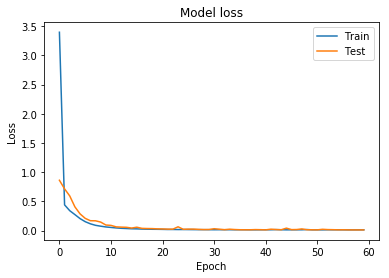

In [20]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

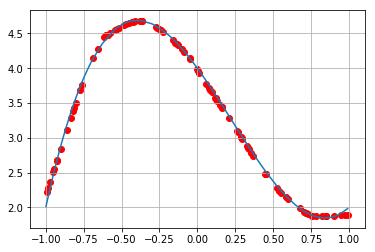

In [21]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

# es11.3